In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../") # go to parent dir

# version
import torch
import torchvision
import torch.utils.data as data
print(torch.__version__)
print(torchvision.__version__)


import cv2
from utils import data_processor

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

1.5.0
0.6.0a0+82fd1c8



### Create the transformed dataset
Apply the transforms in order to get grayscale images of the same shape. Verify that your transform works by printing out the shape of the resulting data (printing out a few examples should show you a consistent tensor size).

In [6]:
root = '/home/redne/mnt/project_zero/project_zero/ds1/parsed/'
voc_classes = ['fork', 'spoon', 'knife', 'coffeeCup', 'clearCup']

imgpath, annopath = data_processor.make_datapath_list(root)
train_img_list, train_anno_list, val_img_list, val_anno_list = imgpath[30:], annopath[30:], imgpath[:30], annopath[:30]

print(train_img_list[0])

/home/redne/mnt/project_zero/project_zero/ds1/parsed/iter127_InstanceGroup2Desccamera_0camera_Shape0_rgb.jpg


In [9]:
transform_anno = data_processor.Anno_json(voc_classes)

ind = 1
image_file_path = val_img_list[ind]
img = cv2.imread(image_file_path)  
height, width, channels = img.shape 


transform_anno(val_anno_list[ind], width, height)

array([[4.29687500e-01, 1.57407407e-02, 4.56250000e-01, 8.88888889e-02,
        1.00000000e+00],
       [6.24479167e-01, 2.22222222e-02, 7.38020833e-01, 1.79629630e-01,
        3.00000000e+00],
       [5.17708333e-01, 3.07407407e-01, 6.24479167e-01, 4.49074074e-01,
        3.00000000e+00],
       [3.84895833e-01, 4.94444444e-01, 4.33854167e-01, 5.54629630e-01,
        2.00000000e+00],
       [6.16666667e-01, 5.09259259e-02, 6.69270833e-01, 6.38888889e-02,
        2.00000000e+00],
       [2.11979167e-01, 1.75925926e-02, 2.28645833e-01, 8.42592593e-02,
        2.00000000e+00],
       [5.46875000e-01, 2.77777778e-03, 6.07812500e-01, 1.77777778e-01,
        3.00000000e+00]])

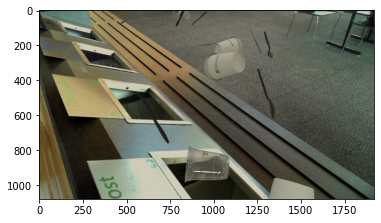

In [12]:
image_file_path = train_img_list[0]
img = cv2.imread(image_file_path)
height, width, channels = img.shape


transform_anno = data_processor.Anno_json(voc_classes)
anno_list = transform_anno(train_anno_list[0], width, height)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


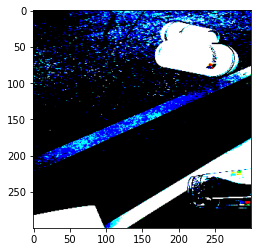

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


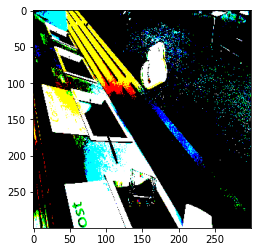

In [13]:
color_mean = (104, 117, 123)  
input_size = 300  
transform = data_processor.VOC_DataTransform(input_size, color_mean)

phase = "train"
img_transformed, boxes, labels = transform(
    img, phase, anno_list[:, :4], anno_list[:, 4])
plt.imshow(cv2.cvtColor(img_transformed, cv2.COLOR_BGR2RGB))
plt.show()

phase = "val"
img_transformed, boxes, labels = transform(
    img, phase, anno_list[:, :4], anno_list[:, 4])
plt.imshow(cv2.cvtColor(img_transformed, cv2.COLOR_BGR2RGB))
plt.show()

---
# Data Loader

In [17]:
color_mean = (104, 117, 123) 
input_size = 300

train_dataset = data_processor.VOCDataset(train_img_list, train_anno_list, phase="train", transform=data_processor.VOC_DataTransform(
    input_size, color_mean), transform_anno=data_processor.Anno_json(voc_classes))

val_dataset = data_processor.VOCDataset(val_img_list, val_anno_list, phase="val", transform=data_processor.VOC_DataTransform(
    input_size, color_mean), transform_anno=data_processor.Anno_json(voc_classes))

val_dataset.__getitem__(1)

(tensor([[[-72.9000, -71.9100, -68.7000,  ..., -79.5000, -92.5000, -88.1800],
          [-70.4300, -66.2200, -67.6000,  ..., -40.8500, -80.2000, -92.5000],
          [-71.4500, -64.6000, -57.2500,  ..., -55.5000, -90.6500, -99.5000],
          ...,
          [ 36.9000,  34.4000,  33.7500,  ..., -42.7500, -42.5500, -48.7500],
          [ 32.6100,  31.7400,  31.9000,  ..., -50.6500, -45.4800, -51.7300],
          [ 27.0500,  34.2300,  36.4000,  ..., -52.6500, -44.7600, -53.2100]],
 
         [[-59.3000, -55.2400, -56.3000,  ..., -74.2000, -83.3700, -84.5800],
          [-60.5300, -55.1900, -56.7000,  ..., -18.0000, -68.2100, -82.8900],
          [-58.6000, -52.6500, -45.5000,  ..., -21.2500, -72.8000, -83.2500],
          ...,
          [ 65.3000,  66.4500,  73.7500,  ...,  -5.5000, -21.6500, -13.7000],
          [ 61.8800,  65.3100,  70.9500,  ...,  -9.9500, -16.2800, -14.0000],
          [ 64.4800,  71.4900,  75.2000,  ..., -17.7000, -20.8300, -14.5100]],
 
         [[-38.0000, -38.040

In [19]:
batch_size = 4

train_dataloader = data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, collate_fn=data_processor.od_collate_fn)

val_dataloader = data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False, collate_fn=data_processor.od_collate_fn)

dataloaders_dict = {"train": train_dataloader, "val": val_dataloader}

batch_iterator = iter(dataloaders_dict["val"])
images, targets = next(batch_iterator) 
print(images.size())  # torch.Size([4, 3, 300, 300])
print(len(targets))
print(targets[1].size()) 

print(train_dataset.__len__())
print(val_dataset.__len__())

torch.Size([4, 3, 300, 300])
4
torch.Size([7, 5])
30
30
